In [149]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [150]:
data = pd.read_csv("covid_19_clean_complete.csv", parse_dates=['Date'])

In [151]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [152]:
data.describe()

,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,49068,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,2020-04-24 12:00:00,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
min,-51.796300,-135.000000,2020-01-22 00:00:00,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,2020-03-08 18:00:00,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,2020-04-24 12:00:00,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,2020-06-10 06:00:00,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,2020-07-27 00:00:00,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06
std,24.950320,70.442740,NaN,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04


In [153]:
data.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

C:\Users\DASHUWAR PC\AppData\Local\Temp\ipykernel_8900\547738797.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")


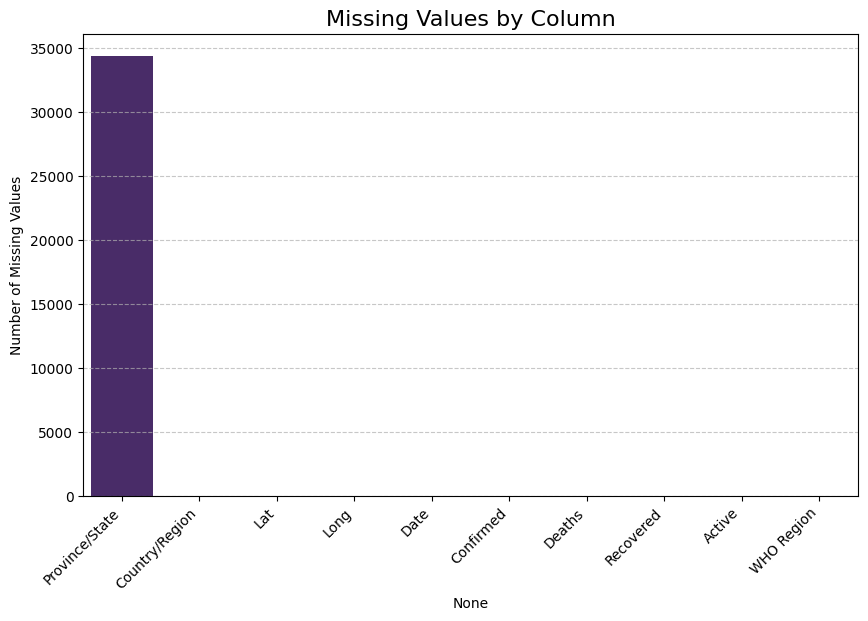

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [154]:
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Check for missing values in each column
missing_values = data.isnull().sum()

# Plot missing values as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.title("Missing Values by Column", fontsize=16)
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Display missing values summary
missing_values


In [155]:
data['Province/State'].fillna('Unknown', inplace=True)

C:\Users\DASHUWAR PC\AppData\Local\Temp\ipykernel_8900\2685416316.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Province/State'].fillna('Unknown', inplace=True)


In [156]:
# Active Case = confirmed - deaths - recovered
data['Active'] = data['Confirmed'] - data[ 'Deaths'] - data['Recovered']

In [157]:
from datetime import datetime as dt

data['Date'] = data['Date'].dt.normalize()
data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')

In [158]:
total_cases = data.loc[:, ['Date', 'Confirmed']].groupby('Date').sum().reset_index()
total_cases

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


Text(0.5, 1.0, 'Worldwide Confirmed Cases Over Time')

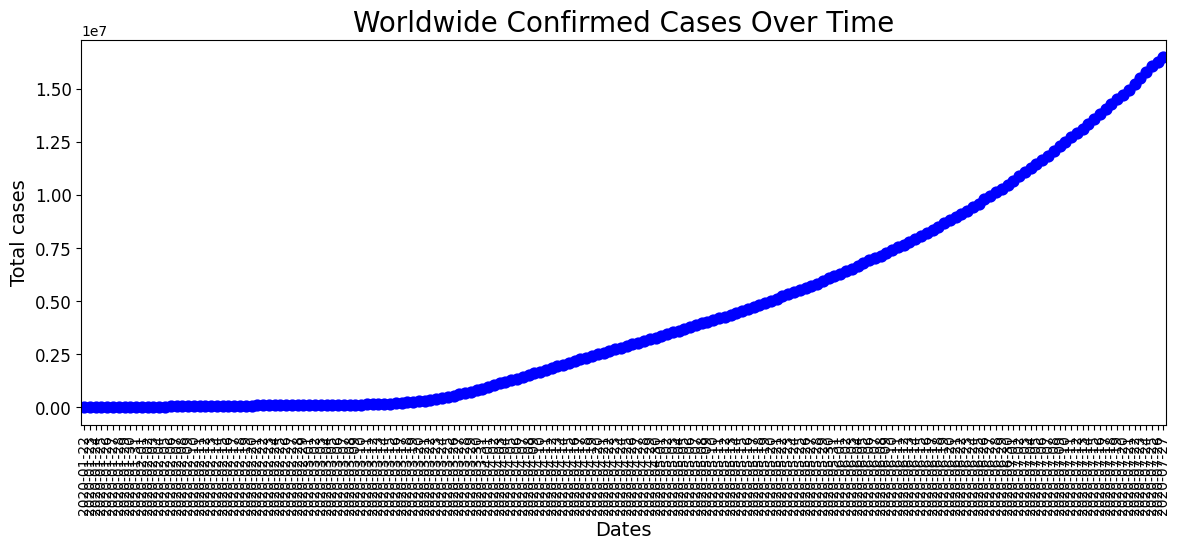

In [159]:
plt.figure(figsize= (14,5))

ax = sns.pointplot(x=total_cases['Date'],
                   y=total_cases['Confirmed'],
                   color='b')
ax.set(xlabel='Dates', ylabel='Total cases')

plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)

plt.xlabel('Dates', fontsize=14)
plt.ylabel('Total cases', fontsize=14)
plt.title('Worldwide Confirmed Cases Over Time', fontsize=20)

In [160]:
top = data.loc[data['Date'] == data['Date'].max()]

In [161]:
top_casualities = top.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending =False).head(10).reset_index()

top_casualities

,Country/Region,Confirmed
0,US,4290259
1,Brazil,2442375
2,India,1480073
3,Russia,816680
4,South Africa,452529
5,Mexico,395489
6,Peru,389717
7,Chile,347923
8,United Kingdom,301708
9,Iran,293606


Text(0.5, 1.0, 'Top 10 countries having most confirmed cases')

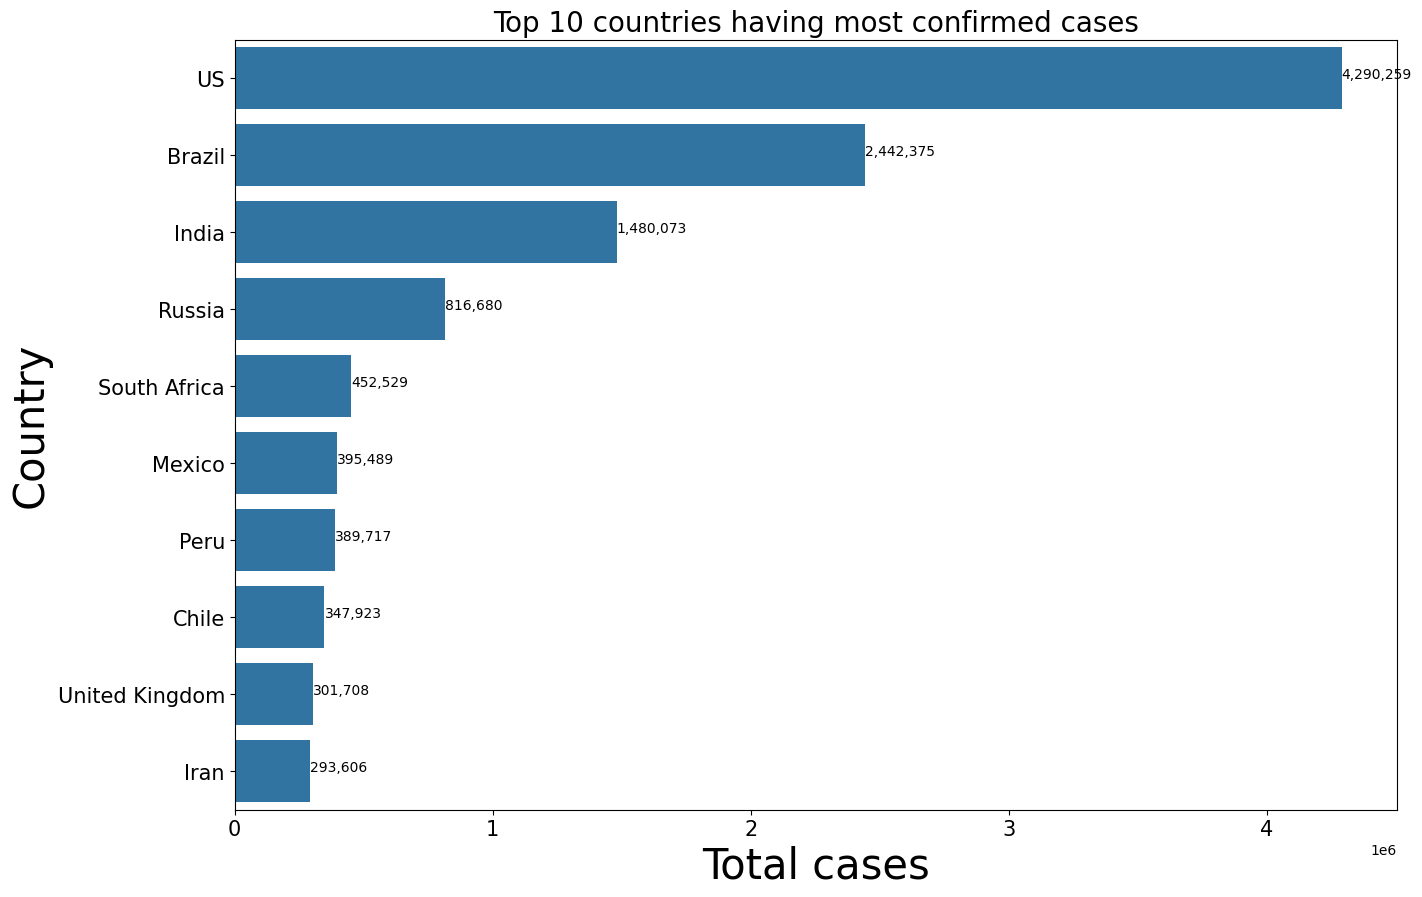

In [162]:

plt.figure(figsize= (15,10))

ax = sns.barplot(x=top_casualities['Confirmed'],
                 y=top_casualities['Country/Region'])

for i, (value, name) in enumerate(zip(top_casualities['Confirmed'], top_casualities['Country/Region'])):
    ax.text(value, i-.05, f'{value:,.0f}', size=10, ha='left', va='center')
ax.set(xlabel='Total cases', ylabel='Country/Region')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Total cases', fontsize=30)
plt.ylabel('Country', fontsize=30)
plt.title('Top 10 countries having most confirmed cases', fontsize=20)

In [163]:
total_deaths = top.groupby('Country/Region')['Deaths'].sum().sort_values(ascending =False).head(10).reset_index()

total_deaths

,Country/Region,Deaths
0,US,148011
1,Brazil,87618
2,United Kingdom,45844
3,Mexico,44022
4,Italy,35112
5,India,33408
6,France,30212
7,Spain,28432
8,Peru,18418
9,Iran,15912


Text(0.5, 1.0, 'Top 10 countries having most dead cases')

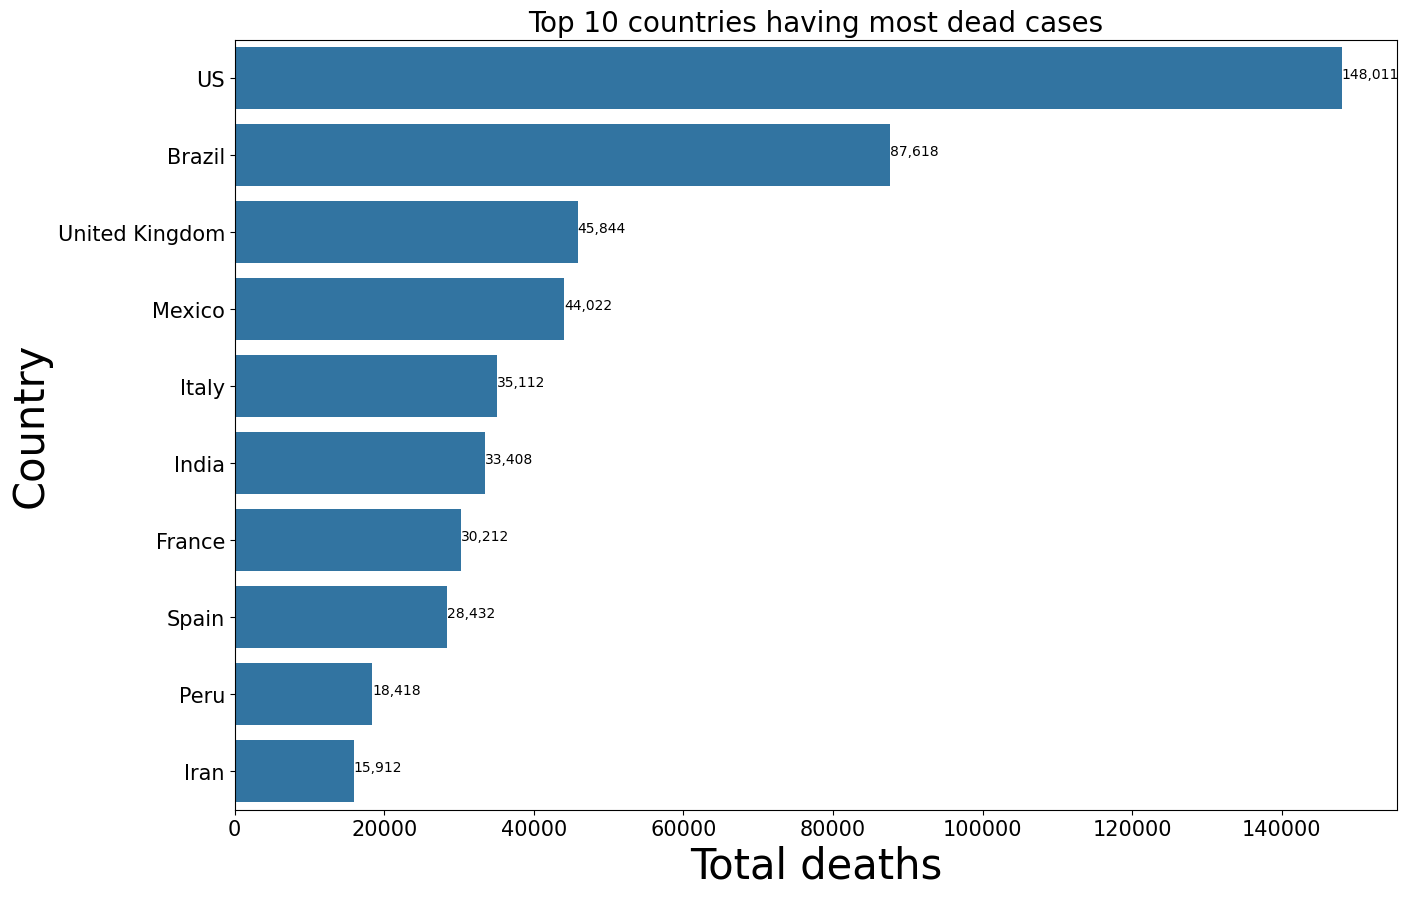

In [164]:
plt.figure(figsize= (15,10))

ax = sns.barplot(x=total_deaths['Deaths'],
                 y=total_deaths['Country/Region'])

for i, (value, name) in enumerate(zip(total_deaths['Deaths'], total_deaths['Country/Region'])):
    ax.text(value, i-.05, f'{value:,.0f}', size=10, ha='left', va='center')
ax.set(xlabel='Total deaths', ylabel='Country/Region')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Total deaths', fontsize=30)
plt.ylabel('Country', fontsize=30)
plt.title('Top 10 countries having most dead cases', fontsize=20)

In [165]:
# Assuming 'data' is your DataFrame and 'Recovered' is the correct column name for recoveries
total_recoveries = data.loc[:, ['Date', 'Recovered']]  # Select 'Date' and 'Recovered' columns
total_recoveries = total_recoveries.groupby('Date').sum().reset_index()  # Group by 'Date' and sum recoveries

# Display the result
print(total_recoveries)


           Date  Recovered
0    2020-01-22         28
1    2020-01-23         30
2    2020-01-24         36
3    2020-01-25         39
4    2020-01-26         52
..          ...        ...
183  2020-07-23    8710969
184  2020-07-24    8939705
185  2020-07-25    9158743
186  2020-07-26    9293464
187  2020-07-27    9468087

[188 rows x 2 columns]


Text(0.5, 1.0, 'Worldwide recoveries Cases Over Time')

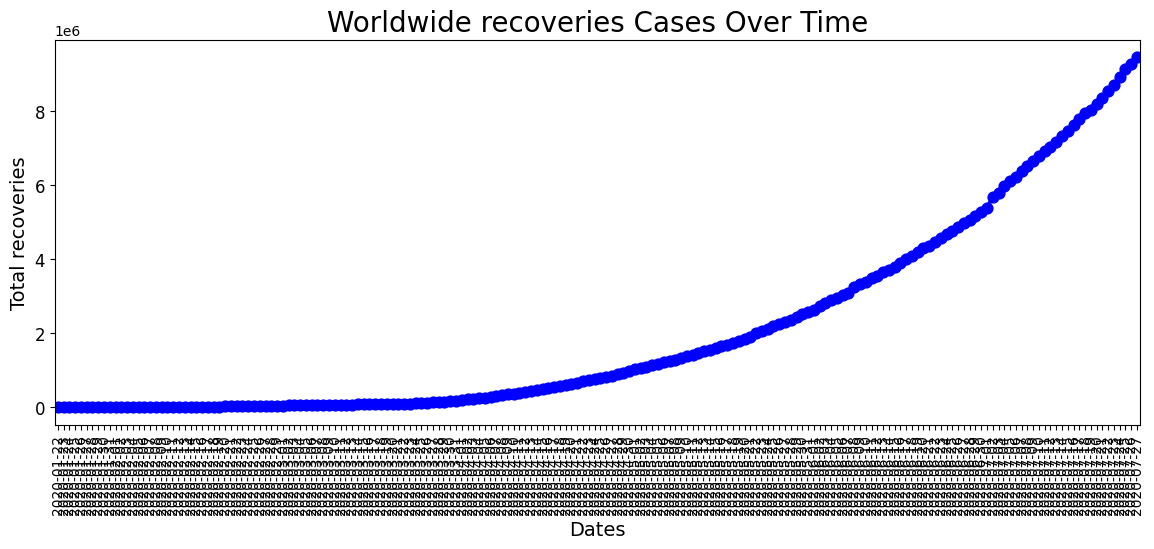

In [166]:
plt.figure(figsize= (14,5))

ax = sns.pointplot(x=total_recoveries['Date'],
                   y=total_recoveries['Recovered'],
                   color='b')
ax.set(xlabel='Dates', ylabel='Total recoveries')

plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)

plt.xlabel('Dates', fontsize=14)
plt.ylabel('Total recoveries', fontsize=14)
plt.title('Worldwide recoveries Cases Over Time', fontsize=20)

In [167]:
# Assuming 'data' is your DataFrame and 'Recovered' is the correct column name for recoveries
total_deaths = data.loc[:, ['Date', 'Deaths']]  # Select 'Date' and 'Recovered' columns
total_deaths = total_deaths.groupby('Date').sum().reset_index()  # Group by 'Date' and sum recoveries

# Display the result
print(total_deaths)

           Date  Deaths
0    2020-01-22      17
1    2020-01-23      18
2    2020-01-24      26
3    2020-01-25      42
4    2020-01-26      56
..          ...     ...
183  2020-07-23  633506
184  2020-07-24  639650
185  2020-07-25  644517
186  2020-07-26  648621
187  2020-07-27  654036

[188 rows x 2 columns]


Text(0.5, 1.0, 'Worldwide deaths Cases Over Time')

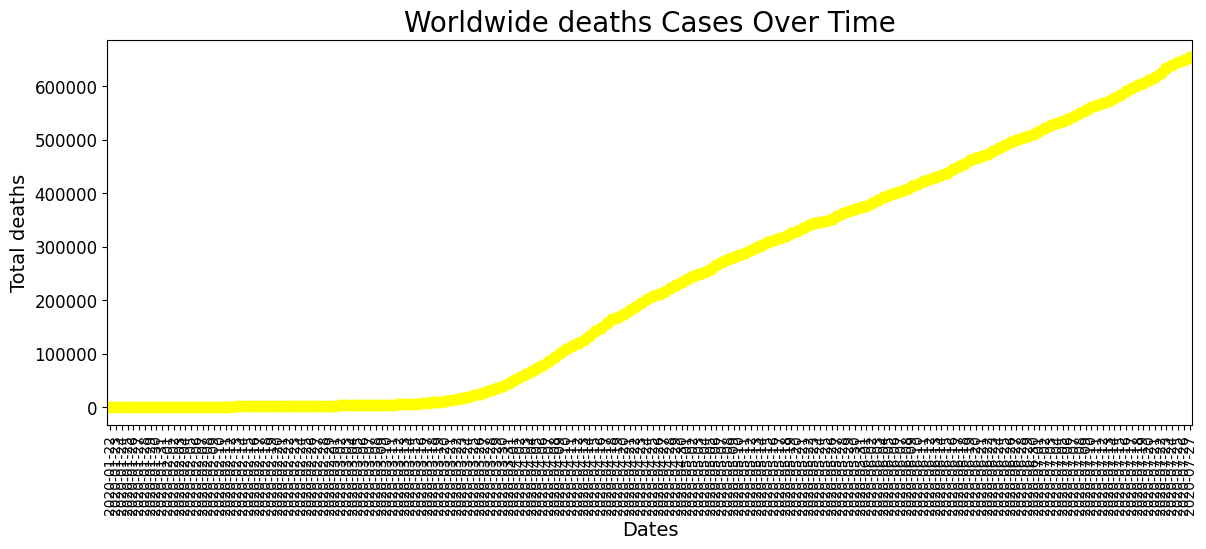

In [173]:
plt.figure(figsize= (14,5))
ax = sns.pointplot(x=total_deaths['Date'],
                   y=total_deaths['Deaths'],
                   color='yellow')
ax.set(xlabel='Dates', ylabel='Total deaths')

plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)

plt.xlabel('Dates', fontsize=14)
plt.ylabel('Total deaths', fontsize=14)
plt.title('Worldwide deaths Cases Over Time', fontsize=20)

Mean Squared Error (MSE): 18838245490.75016


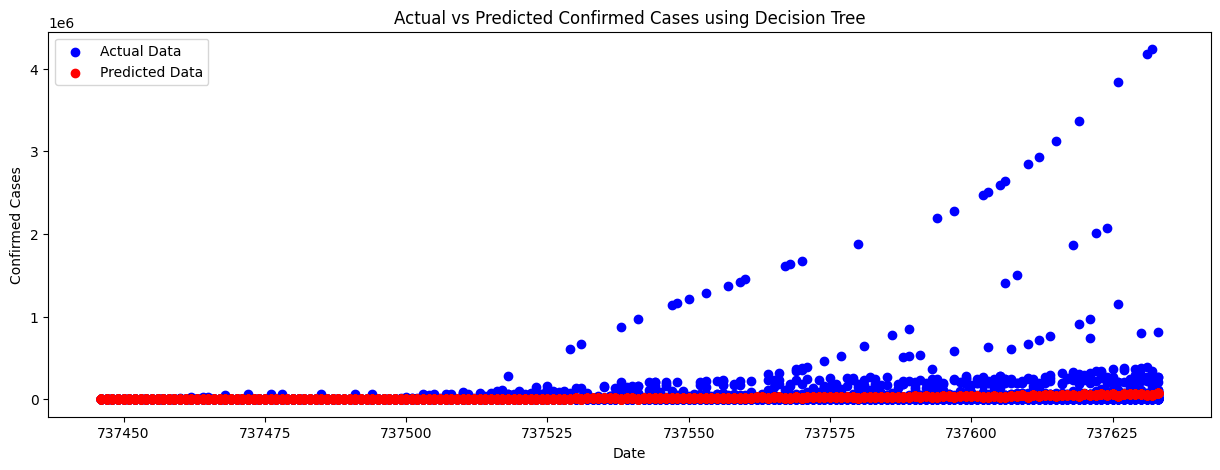

In [168]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Assuming df is already your dataset and you have 'Date' and 'Confirmed' columns

# Prepare data (convert date to numerical format)
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].map(pd.Timestamp.toordinal)  # Convert date to ordinal format (numeric)

# Define features (X) and target (y)
X = data[['Date']]  # Feature: Date
y = data['Confirmed']  # Target: Confirmed cases

# Split data into training and test sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Plot the original data and the predicted values
plt.figure(figsize=(15,5))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')  # Actual data points
plt.scatter(X_test, y_pred, color='red', label='Predicted Data')  # Predicted data points
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Actual vs Predicted Confirmed Cases using Decision Tree')
plt.legend()
plt.show()



Mean Squared Error (MSE): 17220206248.279152


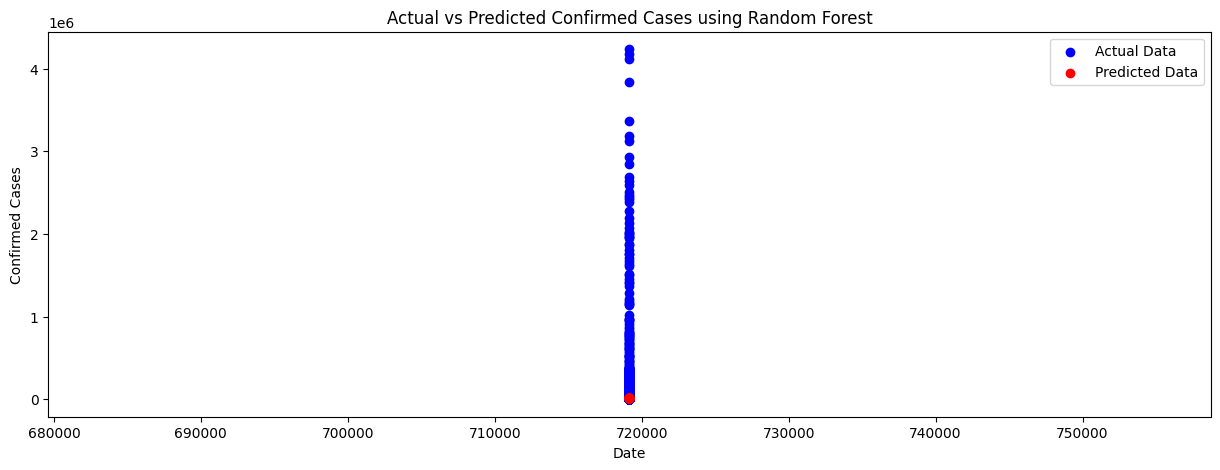

In [169]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt


# Prepare data (convert date to numerical format)
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].map(pd.Timestamp.toordinal)  # Convert date to ordinal format (numeric)

# Define features (X) and target (y)
X = data[['Date']]  
y = data['Confirmed'] 

# Split data into training and test sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Plot the original data and the predicted values
plt.figure(figsize=(15,5))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')  # Actual data points
plt.scatter(X_test, y_pred, color='red', label='Predicted Data')  # Predicted data points
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Actual vs Predicted Confirmed Cases using Random Forest')
plt.legend()
plt.show()


In [170]:
data['Day'] = (data['Date'] - data['Date'].min())
X = data[['Day']]
y = data['Confirmed']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the df into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on test set
predictions = model.predict(X_test)

In [171]:
from sklearn.metrics import mean_absolute_error, r2_score ,mean_squared_error

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'mse: {mse}')

Mean Absolute Error: 28718.174383950096
mse: 19027548181.53383
